In [2]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [3]:
iris = load_iris()
irisDF = pd.DataFrame(data = iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [4]:
# cluster into 3 groups
kmeans = KMeans(n_clusters=3, init='k-means++',max_iter=300,random_state=0)
kmeans.fit(irisDF)

KMeans(n_clusters=3, random_state=0)

In [5]:
irisDF['target'] = iris.target
irisDF['cluster'] = kmeans.labels_
iris_result = irisDF.groupby(['target', 'cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


In [6]:
# 2차원 그래프로 확인해보기 위해서 pca 수행
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

In [7]:
irisDF['pca_x'] = pca_transformed[:,0]
irisDF['pca_y'] = pca_transformed[:,1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


In [14]:
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

print(marker0_ind.shape, marker1_ind.shape, marker2_ind.shape)

(62,) (50,) (38,)


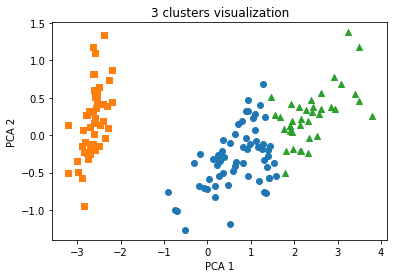

In [15]:
plt.scatter(x = irisDF.loc[marker0_ind, 'pca_x'],y=irisDF.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x = irisDF.loc[marker1_ind, 'pca_x'],y=irisDF.loc[marker1_ind, 'pca_y'], marker='s')
plt.scatter(x = irisDF.loc[marker2_ind, 'pca_x'],y=irisDF.loc[marker2_ind, 'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 clusters visualization')
plt.show()

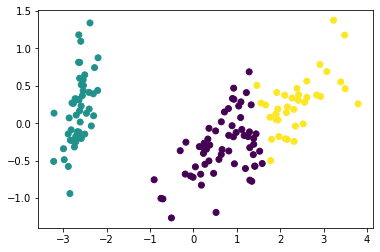

In [8]:
plt.scatter(x = irisDF.loc[:,'pca_x'], y = irisDF.loc[:,'pca_y'], c = irisDF['cluster'])

### 군집화 알고리즘 테스트를 위한 데이터 생성

- 군집화용 데이터 생성기 : make_blobs(), make_classification() API
- 여러 개의 클래스에 해당하는 데이터 세트를 만듦

In [9]:
from sklearn.datasets import make_blobs

X,y = make_blobs(n_samples=200,     # 생성할 총 데이터의 개수
                 n_features=2,      # 데이터의 피처 개수 
                 centers=3,         # (int) 군집의 개수
                 cluster_std=0.8,   # 생성될 군집 데이터의 표준편차 
                 random_state=0)

print(X.shape, y.shape)


(200, 2) (200,)


In [11]:
np.unique(y, return_counts=True)

(array([0, 1, 2]), array([67, 67, 66], dtype=int64))

- 군집 0 : 67개, 군집 1 : 67개, 군집 2 : 66개

In [12]:
clusterDF = pd.DataFrame(X, columns=['ftr_1', 'ftr_2'])
clusterDF['target'] = y
clusterDF.head(3)

,ftr_1,ftr_2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


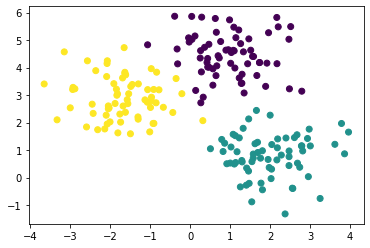

In [13]:
plt.scatter(x = clusterDF['ftr_1'], y = clusterDF['ftr_2'], c = clusterDF['target'])

In [14]:
# 위에서 만들어진 test 데이터 세트에 KMeans 군집화 수행 
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200,random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label'] = cluster_labels

# cluster_centers_ 메서드로 개별 클러스터의 중심 위치 좌표 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)

In [15]:
centers
# 각 centroid 표시

array([[ 0.990103  ,  4.44666506],
       [-1.70636483,  2.92759224],
       [ 1.95763312,  0.81041752]])

Text(0.5, 1.0, 'clustered data and their centers')

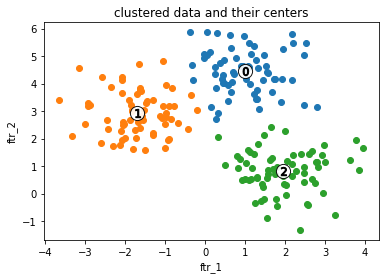

In [20]:
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    plt.scatter(x = label_cluster['ftr_1'], y = label_cluster['ftr_2'])

for i in range(3):
    plt.scatter(x = centers[i][0], y = centers[i][1], s=200, color='white',
            alpha=0.9, edgecolor='k')
    plt.scatter(x = centers[i][0], y = centers[i][1], s=70, color='k',
            marker='$%d$' % i, edgecolor='k')
    
plt.xlabel('ftr_1')
plt.ylabel('ftr_2')
plt.title('clustered data and their centers')


- 위에서 make_blobs() 로 만들어서 정해진 label의 결과와 clustering 결과 생성된 그룹 분류의 결과가 불일치 할 수 있음

In [21]:
clusterDF

,ftr_1,ftr_2,target,kmeans_label
0,-1.692427,3.622025,2,1
1,0.697940,4.428867,0,0
2,1.100228,4.606317,0,0
3,-1.448724,3.384245,2,1
4,1.214861,5.364896,0,0
...,...,...,...,...
195,2.956576,0.033718,1,2
196,-2.074113,4.245523,2,1
197,2.783411,1.151438,1,2
198,1.226724,3.620511,0,0


In [23]:
clusterDF.groupby(['target'])['kmeans_label'].value_counts()

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: kmeans_label, dtype: int64

- 실제로 보면 make_blob()이 0/2라고 분류한 것 중에 아닌 데이터 포인트가 하나 씩 존재했다. 

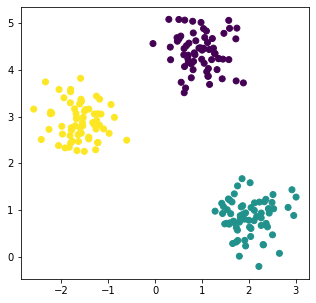

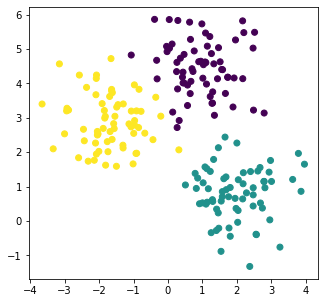

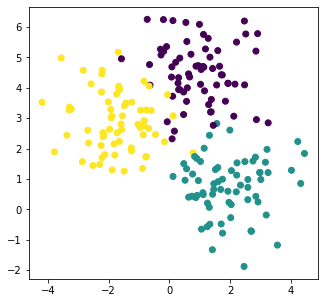

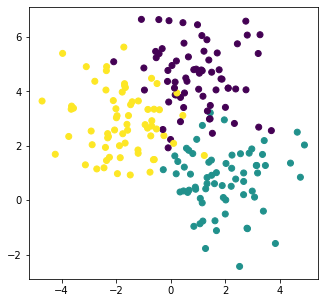

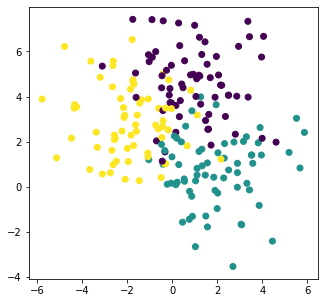

In [34]:
# make_blob의 std 값에 따른 데이터 포인트의 산포도 살펴보기 

for i, std in enumerate ([0.4, 0.8, 1.0, 1.2, 1.6]):
    X,y = make_blobs(n_samples=200, n_features=2, centers=3,        
                 cluster_std=std, random_state=0)
    df = pd.DataFrame(X, columns=['ftr_1', 'ftr_2'])
    df['target'] = y
    plt.figure(figsize=(30,5))
    plt.subplot(1,5,i+1)
    plt.scatter(x = df['ftr_1'], y = df['ftr_2'], c = df['target'])
